In [63]:
# https://github.com/fboldt/aulasann/blob/main/perceptron.ipynb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd
%matplotlib inline

## Considere um dataset de 2 dimensões em que todos os pontos com x1 > x2 pertencem à classe positiva, e todos os pontos com x1 <= x2 pertencem à classe negativa. Assim, o separador entre as duas classes é um hiperplano linear definido por x1 - x2 = 0. Agora crie um dataset com 20 pontos aleatoriamente gerados dentro de uma unidade quadrada no quadrante positivo. Rotule cada ponto dependendo se x1 é maior do que x2, ou não.



In [64]:

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

X, y = geradataset(20)
X, y

(array([[0.69073912, 0.2289642 ],
        [0.04522775, 0.40857516],
        [0.1838938 , 0.38432369],
        [0.09553748, 0.69117466],
        [0.62830179, 0.65418688],
        [0.12423453, 0.23651776],
        [0.65319845, 0.12829548],
        [0.45894508, 0.09257342],
        [0.01653228, 0.39719336],
        [0.20542735, 0.56966941],
        [0.61731872, 0.50342707],
        [0.14165093, 0.18872276],
        [0.87087641, 0.17564735],
        [0.30012732, 0.04785164],
        [0.29807983, 0.65902554],
        [0.63972182, 0.52381702],
        [0.12466012, 0.45723612],
        [0.63570836, 0.58116364],
        [0.58800037, 0.41078281],
        [0.25669546, 0.53078735]]),
 array([ 1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,
         1,  1, -1]))

## 1. Implemente o algoritmo perceptron sem regularização. Treino-o com os 20 pontos gerados, e teste sua acurácia com 1000 pontos gerados aleatoriamente dentro da unidade quadrada. Gere os pontos de teste usando o mesmo procedimento usado para gerar os dados de treino.

In [65]:
def plotadataset(X, y):
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)


def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)


def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(vetor,rotaciona)
    return perp


In [66]:
class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.1
        self.maxiter = 100

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=2)
        for _ in range(self.maxiter):
            ypred = self.predict(X)
            erro = y - ypred
            custo = np.sum(erro**2)
            self.w = self.w + self.alpha*np.matmul(erro, X)
            if custo==0:
                break
    
    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred



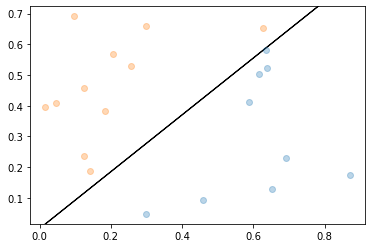

In [67]:
perceptron = Perceptron()
perceptron.fit(X, y)
#ypred_teste = perceptron.predict(X)
X_base_teste, y_base_teste = geradataset(1000)
ypred_base_teste = perceptron.predict(X_base_teste)

acuracias = []
acuracias.append(sum(y_base_teste == ypred_base_teste)/len(y_base_teste))
plotadataset(X, y)
plotavetor(perpendicular(perceptron.w))


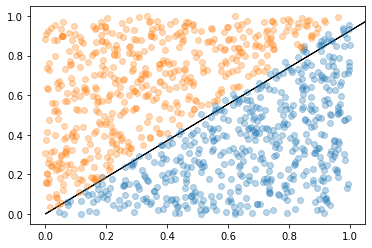

In [68]:
plotadataset(X_base_teste, y_base_teste)
plotavetor(perpendicular(perceptron.w))

## 2. Mude o critério do perceptron para hinge-loss na sua implementação. Repita o treino e a estimativa de acurácia com os mesmo pontos do item anterior.

In [69]:
class Perceptron_HL(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.1
        self.maxiter = 100

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=2)
        for _ in range(self.maxiter):
            ypred = self.predict(X)
            erro = np.multiply(y, ypred) # Hinge-Loss
            custo = np.sum(1 - erro) # Hinge-Loss
            marginais = erro < 1 # Hinge-Loss
            #gradiente = np.matmul(y[marginais], X[marginais])
            self.w = self.w + self.alpha*np.matmul(y[marginais],
                                                   X[marginais])
            if custo==0:
                break
    
    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

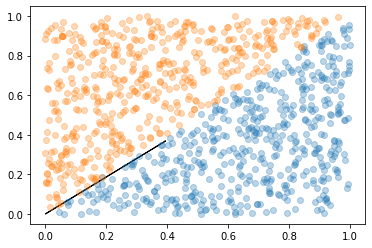

In [70]:
perceptron_hl = Perceptron_HL()
perceptron_hl.fit(X, y)
ypred_base_teste = perceptron_hl.predict(X_base_teste)
acuracias.append(sum(y_base_teste == ypred_base_teste)/len(y_base_teste))

plotadataset(X_base_teste, y_base_teste)
plotavetor(perpendicular(perceptron_hl.w))

## 3. Em qual caso você obteve a melhor acurácia, e por quê?

,Acurácia
Custo Quad,0.965
Hinge-Loss,0.969


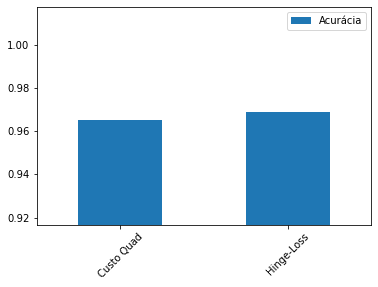

In [79]:
df_acur = pd.DataFrame(acuracias,
             index=['Custo Quad','Hinge-Loss'],
                      columns=['Acurácia'])
df_acur.plot.bar(rot=45)
plt.ylim(min(acuracias)*0.95)
df_acur

Resposta: Utilizando o Hinge-Loss a acurácia foi ligeiramente melhor. A atualizaçao dos pesos utilizando os dados marginais permitiu uma fronteira( Hiperplano separador) mais eficiente, tanto na convergência como na seleção.

## 4. Em qual caso você acha que a classificação dos mesmos 1000 pontos de teste não será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes, também gerados aleatoriamente?



Text(0.5, 1.0, 'Acurácias obtidas de bases aleatórias para comparação dos critérios')

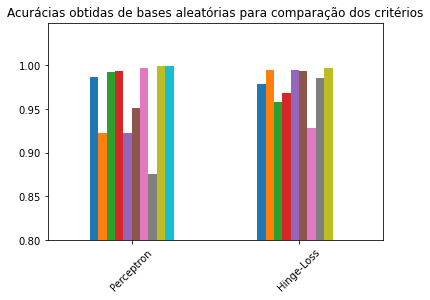

In [102]:
acuracia_teste_perceptron = []
acuracia_teste_hl = []
for _ in range(10):
    X, y = geradataset(20)
    perceptron.fit(X, y)
    X, y = geradataset(20)
    perceptron_hl.fit(X, y)
    X_test, y_test = geradataset(1000)
    y_pred_per = perceptron.predict(X_test)
    y_pred_hl = perceptron_hl.predict(X_test)
    acuracia_teste_perceptron.append(sum(y_test == y_pred_per)/len(y_test))
    acuracia_teste_hl.append(sum(y_test == y_pred_hl)/len(y_test))

df_acur_4 = pd.DataFrame([acuracia_teste_perceptron,
                         acuracia_teste_hl], 
                        index=['Perceptron','Hinge-Loss'])

df_acur_4.plot.bar(rot=45, legend=False)
plt.ylim(0.8)
plt.title('Acurácias obtidas de bases aleatórias para comparação dos critérios')


Resposta: Hinge-Loss, justamente pelo metódo estar focado na obtencão de uma melhor fronteira, não fará muita diferença a base de dados ser diferente.